In [ ]:
#tensorflow is the deep learning framework
import tensorflow as tf
from tensorflow import keras
#keras is a wrapper class
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#Dropout regularization: to get rid of overfitting problems
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
#as in this dataset,we already know there are 10 classes, so we can define it
#number of classes-do not change unless the data changes
num_classes = 10


In [ ]:
#size of batch and no.of epochs of data
batch_size = 64
epochs = 24

In [ ]:
#defining the dimension of image as each and every img is of different dimension
#so, we should normalize each and every image and that is why we are defining the dimension i.e. here 28*28
#resizing all the images to 28 * 28 format
img_rows, img_cols = 28,28


In [ ]:
#data,shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#so, here we can see that the training data has 60,000 data and batch size = 64
#so, the no.of iteration required in one epoch = 60,000/64 = 937.5 iterations
#and so total no. of epochs = 24, so, 937.5 *24  = 22,500 times total iterations and 22,500 times weights will be updated

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train.shape[0]

60000

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # we have passed at last 1 here for all as it is gray -scale img
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols,1)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#type convert and scale the test and the training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#doing feature scaling down
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [ ]:
#convert class vectors to binary class matrices-- one hot encoding
#one hot encoding converts numerical categorical variables into binary vectors
# this type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the
#feature of each sample that corresponds to its original category.
# 3 -> 0 0 0 1 0 0 0 0 0 0  and  1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2]) #to verify one hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#cnn code 


In [ ]:
#define the model
model = Sequential()

In [ ]:
num_classes

10

Create a CNN to classify images

In [ ]:
#below we are creating 2 layer Conv2D network
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) 
#here above 32 is the hyperparameter which definres the no. of filters and kernel_size is the filter size
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size =(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(128, activation='relu')) #fully-connected layers
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#softmax function assigns decimal probabilities to each class in a multi-class problem

   #output layer, here the no.of neurons will
#be equal to num_classes as 10 categories = num_classes and that many neurons should only be 
#present as num_classes categories will be there

#if it is the binary classification, then we can use sigmoid fn in the output/final dense output layer


In [61]:
#define compile to minimize the categorical loss, use some optimizer to optimize,ada delta optimized, and optimize to maximum accuracy
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#categorical cross entropy/ sparse categorical cross-entropy is the loss function for multi-class classification and it is binary cross entropy for binary classification
#there are other better optimizers than Adam (Adaptive Moment Estimation) Optimizer like SDD optimizer, RMSprop optimizer, and we can use these
#Adam is a replacement optimization algorithm for stochastic gradientdescent for training deep learning models.


#train the model and test/validate the mode with the test data after each cycle(epoch) through the training data
#return the history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train, batch_size= batch_size, 
                 epochs=epochs, verbose=1, validation_data=(x_test, y_test))
#here batch size = 64 and epochs = 24

"""
verbose basically means logs. It accepts values as 0/1. If you put Verbose value as 1 in ModelCheckPoint callback, after
 each epoch you will get the statement after each epoch that the model got improved from error 456 to 123
 or model did not improve in this epoch 
 """
 





Epoch 1/24
938/938 [==============================] - 33s 35ms/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.4203 - val_accuracy: 0.9107
Epoch 2/24
938/938 [==============================] - 29s 31ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 0.4542 - val_accuracy: 0.9073
Epoch 3/24
938/938 [==============================] - 29s 31ms/step - loss: 0.0459 - accuracy: 0.9829 - val_loss: 0.4635 - val_accuracy: 0.9075
Epoch 4/24
938/938 [==============================] - 29s 31ms/step - loss: 0.0455 - accuracy: 0.9832 - val_loss: 0.4680 - val_accuracy: 0.9073
Epoch 5/24
938/938 [==============================] - 29s 31ms/step - loss: 0.0427 - accuracy: 0.9838 - val_loss: 0.4751 - val_accuracy: 0.9106
Epoch 6/24
938/938 [==============================] - 28s 30ms/step - loss: 0.0362 - accuracy: 0.9866 - val_loss: 0.4689 - val_accuracy: 0.9069
Epoch 7/24
938/938 [==============================] - 29s 30ms/step - loss: 0.0400 - accuracy: 0.9844 - val_loss: 0.4805 - val_accuracy:

'\nverbose basically means logs. It accepts values as 0/1. If you put Verbose value as 1 in ModelCheckPoint callback, after\n each epoch you will get the statement after each epoch that the model got improved from error 456 to 123\n or model did not improve in this epoch \n '

In [62]:
hist.history

{'loss': [0.053029656410217285,
  0.04960523918271065,
  0.04587823152542114,
  0.04553401842713356,
  0.04270991310477257,
  0.036239977926015854,
  0.040004145354032516,
  0.03531184792518616,
  0.037380021065473557,
  0.03153898939490318,
  0.03309536725282669,
  0.030354583635926247,
  0.03200914338231087,
  0.02917293831706047,
  0.028012998402118683,
  0.029653184115886688,
  0.025627031922340393,
  0.03242238610982895,
  0.02074713259935379,
  0.028455369174480438,
  0.02330111153423786,
  0.03173986077308655,
  0.022451601922512054,
  0.019894540309906006],
 'accuracy': [0.9799666404724121,
  0.9812999963760376,
  0.9828500151634216,
  0.9831833243370056,
  0.9837833046913147,
  0.9865833520889282,
  0.9843833446502686,
  0.9868000149726868,
  0.9861833453178406,
  0.9884833097457886,
  0.9879000186920166,
  0.9890666604042053,
  0.988183319568634,
  0.9895166754722595,
  0.989466667175293,
  0.9894166588783264,
  0.991016685962677,
  0.9883333444595337,
  0.9926999807357788,
 

Test Loss: 0.7060851454734802
Test accuracy: 0.9017999768257141


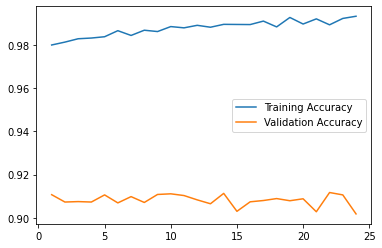

In [69]:
#evaluate the model with the test data to get the scores on 'real' data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# it sets the backend of matplotlib to the 'inline' backend
epoch_list = list(range(1, len(hist.history['accuracy']) + 1)) #values of x-axis-[1,2,3....]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()



In [64]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [4]:
#observations
#in Conv2D, before the i/p image was 28 * 28 *1, and after  that as visible it is 26*26*32 , so
#filter size is 32, and whenever there are n*n filter and when stride=1, so, we get (n-2)*(n-2) matrix.

#maxpooling of 2*2 is cutting down the pixels by 2 i.e. /2 ; so here 26/2 = 13*13

#then n-2, = 13-2 =11 (conv2d)
#and then 13/2 = 5 (maxpooling 2d)
# for flattening, multiply the pixels; -> 5*5*32 = 800



In [5]:
"""
Parameters in a Conv Layer:(Param)
((shape of width of filter * shape of height of filter * number of filters in the previous layer+1)* no. of filters)

so, for first one:  width of filter = 3, height of filter = 3, no. of filters in prev layer = 1, no. of filters =32
so, ((3*3*1+1)*32) = 10*32 = 320

for 2nd conv2d layer: width =3, height=3, no.of filters in prev layer=32, no. of filters = 32
so,((3*3*32+1)*32) = (288+1)*32 = 9248

"""

'\nParameters in a Conv Layer:(Param)\n((shape of width of filter * shape of height of filter * number of filters in the previous layer+1)* no. of filters)\n\nso, for first one:  width of filter = 3, height of filter = 3, no. of filters in prev layer = 1, no. of filters =32\nso, ((3*3*1+1)*32) = 10*32 = 320\n\nfor 2nd conv2d layer: width =3, height=3, no.of filters in prev layer=32, no. of filters = 32\nso,((3*3*32+1)*32) = (288+1)*32 = 9248\n\n'

In [6]:
"""
Parameters in FC(Fully Connected) layer :
((current layer c * previous layer p)+1 *c)

for 1st dense layer: current layer=128, prev layer=800
so, ((128*800)+1 *128) = 102528
for 2nd dense layer:
  c= 64, p=128,
  so, ((64*128)+1 * 64) = 8256

  for 3rd dense layer/output layer:
    c=10, p=64
    so,((10*64)+10) = 650
"""

'\nParameters in FC(Fully Connected) layer :\n((current layer c * previous layer p)+1 *c)\n\nfor 1st dense layer: current layer=128, prev layer=800\nso, ((128*800)+1 *128) = 102528\nfor 2nd dense layer:\n  c= 64, p=128,\n  so, ((64*128)+1 * 64) = 8256\n\n  for 3rd dense layer/output layer:\n    c=10, p=64\n    so,((10*64)+10) = 650\n'